In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/From_scratch/PXD002516_formatted_2.tsv", sep="\t")

/tmp/ipykernel_3365799/2436177615.py:1: DtypeWarning: Columns (6,9,10,13,14,16,17,18,19,20,22,27,28,29,30,31,32,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/From_scratch/PXD002516_formatted_2.tsv", sep="\t")


# Again

In [3]:
data = data[(data["Comet Raw Sequence"] == data["ionbot Sequence"])]

In [4]:
deamidatediff2 = data[(data["Comet Raw Sequence"] == data["ionbot Sequence"]) & (((data["comet_mods_formatted"] == "['deamidated']") & (data["ionbot_mods_formatted"].isna())) | ((data["comet_mods_formatted"].isna()) & (data["ionbot_mods_formatted"] == "['deamidated']")))].index

In [5]:
deamidatediff2

Int64Index([    52,   2274,   2484,   2523,   2561,   2562,   2599,   2767,
              2800,   2916,
            ...
            331924, 332254, 334192, 334300, 334586, 336078, 336661, 336787,
            337152, 339145],
           dtype='int64', length=1157)

In [6]:
data["Deamidation ambiguity"] = "Remove"
data.loc[deamidatediff2, "Deamidation ambiguity"] = True
data.loc[(data["ionbot_mods_formatted"].isna() & data["comet_mods_formatted"].isna()), "Deamidation ambiguity"] = False

In [7]:
data = data[data["Deamidation ambiguity"] != "Remove"]

In [8]:
data

,Unnamed: 0.1,Unnamed: 0,Spectrum File,Scan,charge,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,...,comet proteins,fragger proteins,pfind proteins,Comet Raw Sequence,ionbot_mods_formatted,all_fragger_mods,fragger_mods_formatted,pfind_mods_formatted,comet_mods_formatted,Deamidation ambiguity
13,13,13,131023_Sunil_PPT_Brain_A_01,10248.0,2.0,1318.69468,IMNTFSVVPSPK,1318.69549,1318.6955,NaN,...,sp|P68371|TBB4B_HUMAN,sp|P04350|TBB4A_HUMAN,sp|P68371|TBB4B_HUMAN/sp|Q13509|TBB3_HUMAN/sp|...,IMNTFSVVPSPK,NaN,nan#nan,NaN,NaN,NaN,False
17,17,17,131023_Sunil_PPT_Brain_A_01,10287.0,2.0,1162.62217,LVNELTEFAK,1162.62337,1162.6234,NaN,...,sp|ALBU_BOVIN|,contam_sp|P02769|ALBU_BOVIN,sp|ALBU_BOVIN|/,LVNELTEFAK,NaN,nan#nan,NaN,NaN,NaN,False
22,22,22,131023_Sunil_PPT_Brain_A_01,10406.0,3.0,1459.70806,TQDENPVVHFFK,1459.70957,1459.7096,NaN,...,sp|P02686|MBP_HUMAN,sp|P02686|MBP_HUMAN,sp|P02686|MBP_HUMAN/,TQDENPVVHFFK,NaN,nan#nan,NaN,NaN,NaN,False
29,29,29,131023_Sunil_PPT_Brain_A_01,10506.0,3.0,1459.70852,TQDENPVVHFFK,1459.70957,1459.7096,NaN,...,sp|P02686|MBP_HUMAN,sp|P02686|MBP_HUMAN,sp|P02686|MBP_HUMAN/,TQDENPVVHFFK,NaN,nan#nan,NaN,NaN,NaN,False
30,30,30,131023_Sunil_PPT_Brain_A_01,10509.0,2.0,2162.04807,LGEDNINVVEGNEQFISASK,2162.04911,2162.0491,NaN,...,sp|TRY1_BOVIN|,contam_sp|P00760|TRY1_BOVIN,sp|TRY1_BOVIN|/,LGEDNINVVEGNEQFISASK,NaN,nan#nan,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341538,341538,341538,131121_Sunil_Prot_BrainAmine_AProfile_26,9743.0,2.0,1767.77732,DNENVVNEYSSELEK,1767.77987,1767.7799,NaN,...,sp|P02675|FIBB_HUMAN,sp|P02675|FIBB_HUMAN,sp|P02675|FIBB_HUMAN/,DNENVVNEYSSELEK,NaN,nan#nan,NaN,NaN,NaN,False
341539,341539,341539,131121_Sunil_Prot_BrainAmine_AProfile_26,9747.0,2.0,1214.62388,DNLAQDLATVR,1214.62548,1214.6255,NaN,...,sp|P14136|GFAP_HUMAN,sp|P14136|GFAP_HUMAN,sp|P14136|GFAP_HUMAN/,DNLAQDLATVR,NaN,nan#nan,NaN,NaN,NaN,False
341542,341542,341542,131121_Sunil_Prot_BrainAmine_AProfile_26,9777.0,3.0,1466.83453,RHPDYSVVLLLR,1466.83572,1466.8358,NaN,...,sp|P02768|ALBU_HUMAN,sp|P02768|ALBU_HUMAN,NaN,RHPDYSVVLLLR,NaN,nan#nan,NaN,NaN,NaN,False
341547,341547,341547,131121_Sunil_Prot_BrainAmine_AProfile_26,9836.0,3.0,1814.84242,DSGRDYVSQFEGSALGK,1814.84346,1814.8435,NaN,...,sp|P02647|APOA1_HUMAN,sp|P02647|APOA1_HUMAN,sp|P02647|APOA1_HUMAN/,DSGRDYVSQFEGSALGK,NaN,nan#nan,NaN,NaN,NaN,False


In [9]:
data[data["Deamidation ambiguity"] == True].shape

(1157, 38)

<Axes: xlabel='precursor_mass', ylabel='Density'>

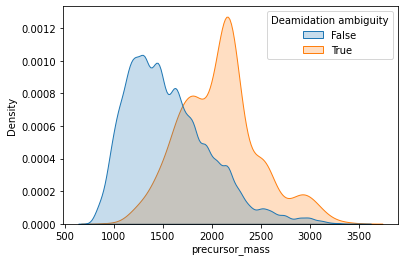

In [10]:
sns.kdeplot(data=data, x ="precursor_mass", hue="Deamidation ambiguity", common_norm=False, fill=True)

In [11]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x=data.loc[data["Deamidation ambiguity"] == False,"precursor_mass"], y=data.loc[data["Deamidation ambiguity"] == True, "precursor_mass"], alternative="less")

MannwhitneyuResult(statistic=19847965.5, pvalue=2.571243046964861e-307)

<Axes: xlabel='charge', ylabel='Density'>

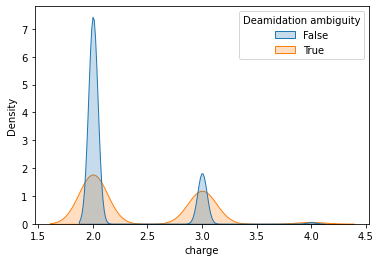

In [14]:
sns.kdeplot(data=data, x ="charge", hue="Deamidation ambiguity", common_norm=False, fill=True)

In [13]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x=data.loc[data["Deamidation ambiguity"] == False,"charge"], y=data.loc[data["Deamidation ambiguity"] == True, "charge"], alternative="less")

MannwhitneyuResult(statistic=43257176.5, pvalue=2.067520828314503e-72)